<a href="https://colab.research.google.com/github/avoss22/NGG6050/blob/main/QNC_Red_HW_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# QuantNeuro Homework 4: Linear Regression

## Anna Voss

## 10-1-23


# Example 1: London Taxi Drivers
Perhaps one of the more famous early studies using MRI and fMRI to relate behavior to underlying neuroanatomy are the studies that looked at relationships between experience as a taxi-cab drivers in London and hippocampus size. In the first study, they found a correlation between hippocampal size (in the posterior region]) and time as a taxi-cab driver. In London, taxi drivers have to take a test showing their knowledge of the streets of London. Here is one of their key findings:

Without getting into details of the science itself, do you think a liner regression is a proper way to analyze this data set? Are the data linear? Why or why not? If not, how does that weaken any interpretation of the data?

In a follow-up study, they compared taxi cab drivers with bus drivers and found a correlation between years of driving experience and hippocampal size for the taxi cab drivers but not for the bus drivers. They argued that the basis for these results is the observation that bus drivers drive the same route everyday, whereas taxi cab drivers have to know the entire city and be flexible in how they navigate the city. Can one make any sort of inference about casualty from this finding? What are the weaknesses and strengths of such a study and set of findings?

1. Linear regression is not the proper way to analyze this data because the data is parabolic, not linear. Since the data are not linear, any data from a linear regression proves irrelevant and thus makes the correlation coefficient meaningless.
2. You cannot make any inference about causality from this finding because it is possible that a third, unstudied variable is contributing to this result, and there are not sufffient controls for this variable. A strength of this set of findings is that they studied varrying lengths of time spent driving, but major weaknesses include lack of proper population controls and incorrect fitting/regression of the data.

# Example 2: Musical Brains
Here is another example, in which a group of scientists attempt to relate behavioral function with changes in underlying neuroanatomy. This is not bad, mind you, but fraught with complexities. In this study, they studied how musical information was represented in the brains of musicians with perfect (absolute) pitch (i.e., can recognize a note or reproduce a note without any reference note) or relative pitch (need a reference note) and a control group. Here is their first figure:

In panel b, they plot the correlation between frequency and region of brain activation or each of the 3 groups. This correlation is done for pure tones (panel a, left; like those produced by a tuning fork) and for piano notes (panel a, right). What do you think of their n? How strong of a claim do you think they can make with their regression based on their n? What would their confidence intervals look like? In each plot, there are 2 regression lines. In theory, can you think of a way to decide if the two regression lines are the same or not? What would be your H0?

1. The lack of a sufficiently large n was the first thing that stuck out to me in panel B, and leads me to believe that you can barely make a claim with regression or any statistical test, given this n. Their confidence intervals should be massive, because there is so much possible variability in the population. You could compare the regression coefficients via hypothesis testing, and the H0 would be that there is no difference between the two regression lines/coefficients.  

Panel b is like the taxi-cab paper in which they correlate musical experience (age in which they started playing an instrument) with a measure of brain activation (the higher the mean dipole moment, the more the neurons are nominally activated). Ignoring the two types of musicians, what is the take-home message from the graph? Is it ok to treat both sets of musicians as one group? What assumptions would you have to make? What tests do you think you should do(qualitatively speaking)? Do you think you should report (if this was your paper] the regression between moment and the two groups separately?

2. The authors are trying to make the take-home message of the graph that musicians who started music earlier in life have a larger strength of neuronal activation in response to tones. I do not think that it is ok to treat these musicians as one group because you have to assume that strength of neuronal activity doesn't change between these individuals. This is not necessarily true. Similarly to the taxi driver regression, I would regress data points from both musician types seperately and run a hypothesis test on their respective correltation coefficients. I would report the regression between moment and the two groups seperately because the groups were studied seperately throughout the paper and there is a differentiating factor between them that I would hope to investigate through this paper.  

# Exercises
Using the following data set to investigate the relationship between Age and Wing Length, and use the data to generate answers to the prompts below:

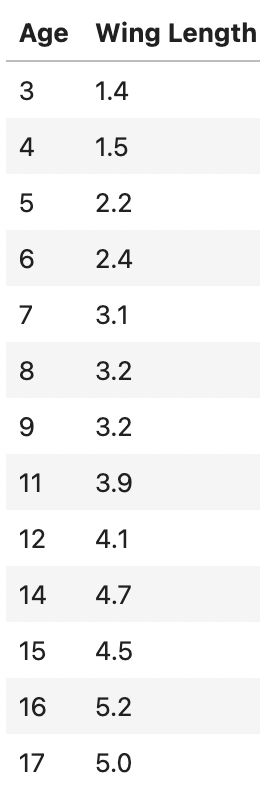

1. Plot the relationship between Age and Wing Length.
2. Calculate and plot the regression line.
3. Can you reject H0: b = 0?
4. Calculate and plot the confidence intervals on the slope of the regression.
4. Calculate r^2 (the coefficient of determination)
6. Calculate Pearson's r.
7. Add some noise to the data and see how the regression changes.



In [20]:
# Setup:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import scipy.stats as stats

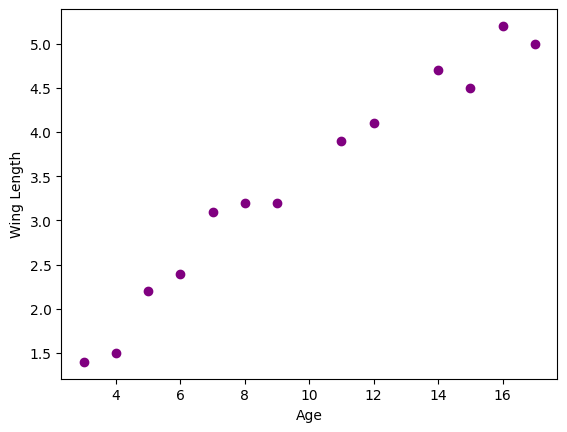

In [13]:
# 1: Plot the relationship between Age and Wing Length.

age = [3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17]
wing_length = [1.4, 1.5, 2.2, 2.4, 3.1, 3.2, 3.2, 3.9, 4.1, 4.7, 4.5, 5.2, 5.0]

# Create a scatter plot
plt.scatter(age, wing_length, color='purple')

# Add labels and a legend
plt.xlabel('Age')
plt.ylabel('Wing Length')

# Show the plot
plt.show()

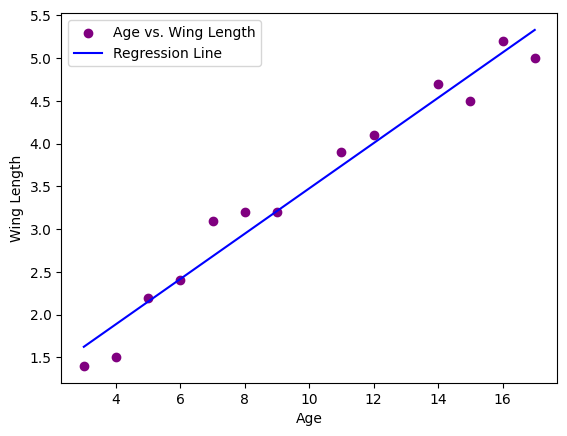

Regression Equation: Wing Length = 0.26 * Age + 0.83


In [18]:
# 2: Calculate and plot the regression line.

# https://realpython.com/linear-regression-in-python/
# ChatGPT

# Your data
age = np.array([3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17]).reshape(-1, 1)  # Reshape to a 2D array
wing_length = np.array([1.4, 1.5, 2.2, 2.4, 3.1, 3.2, 3.2, 3.9, 4.1, 4.7, 4.5, 5.2, 5.0])

# Create a linear regression model
regressor = LinearRegression()

# Fit the model to the data
regressor.fit(age, wing_length)

# Get the coefficients (slope and intercept)
slope = regressor.coef_[0]
intercept = regressor.intercept_

# Recreate the scatter plot
plt.scatter(age, wing_length, label='Age vs. Wing Length', color='purple')

# Add the regression line to the plot
plt.plot(age, regressor.predict(age), color='blue', label=' Linear Regression Line')

# Add labels and a legend
plt.xlabel('Age')
plt.ylabel('Wing Length')
plt.legend()

# Show the plot
plt.show()

# Print the regression equation
print(f'Regression Equation: Wing Length = {slope:.2f} * Age + {intercept:.2f}')


In [22]:
# 3: Can you reject H0: b = 0?

# Add a constant term (intercept) to the independent variable
age_with_intercept = sm.add_constant(age)

# Fit a linear regression model
model = sm.OLS(wing_length, age_with_intercept).fit()

# Print the summary of the regression model
print(model.summary())

#P > |t| is < 0.05 so at the 0.05 confidence level, we can reject H0: b = 0.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     289.4
Date:                Mon, 02 Oct 2023   Prob (F-statistic):           3.01e-09
Time:                        02:34:14   Log-Likelihood:                0.36312
No. Observations:                  13   AIC:                             3.274
Df Residuals:                      11   BIC:                             4.404
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8296      0.168      4.946      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Intercept: 1.0 , Slope: 0.26 , r squared: 0.96 , Mean Squared Error: 0.0


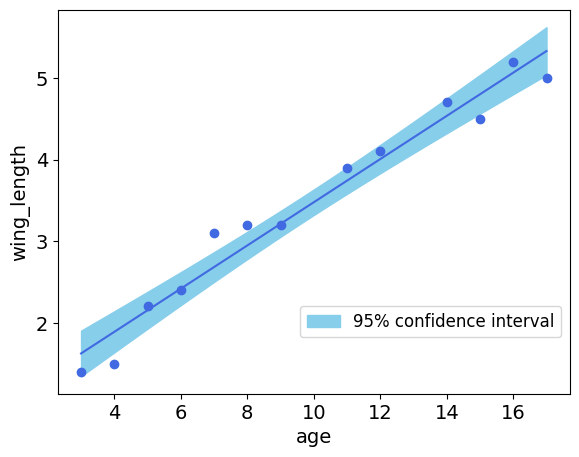

In [43]:
# 4: Calculate and plot the confidence intervals on the slope of the regression.
# 5: Calculate r^2 (the coefficient of determination)

# https://stackoverflow.com/questions/27164114/show-confidence-limits-and-prediction-limits-in-scatter-plot

age = np.array([3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17])
wing_length = np.array([1.4, 1.5, 2.2, 2.4, 3.1, 3.2, 3.2, 3.9, 4.1, 4.7, 4.5, 5.2, 5.0])

slope, intercept = np.polyfit(age, wing_length, 1)  # linear model adjustment

wing_length_model = np.polyval([slope, intercept], age)   # modeling...

age_mean = np.mean(age)
wing_length_mean = np.mean(wing_length)
n = age.size                        # number of samples
m = 2                             # number of parameters
dof = n - m                       # degrees of freedom
t = stats.t.ppf(0.975, dof)       # Students statistic of interval confidence

residual = wing_length - wing_length_model

std_error = (np.sum(residual**2) / dof)**.5   # Standard deviation of the error

# calculating the r2
# https://www.statisticshowto.com/probability-and-statistics/coefficient-of-determination-r-squared/
# Pearson's correlation coefficient
numerator = np.sum((age - age_mean)*(wing_length - wing_length_mean))
denominator = ( np.sum((age - age_mean)**2) * np.sum((wing_length - wing_length_mean)**2) )**.5
correlation_coef = numerator / denominator
r2 = correlation_coef**2

# mean squared error
MSE = 1/n * np.sum( (wing_length - wing_length_model)**2 )

# to plot the adjusted model
age_line = np.linspace(np.min(age), np.max(age), 100)
wing_length_line = np.polyval([slope, intercept], age_line)

# confidence interval
ci = t * std_error * (1/n + (age_line - age_mean)**2 / np.sum((age - age_mean)**2))**.5

############### Ploting
plt.rcParams.update({'font.size': 14})
fig = plt.figure()
ax = fig.add_axes([.1, .1, .8, .8])

ax.plot(age, wing_length, 'o', color = 'royalblue')
ax.plot(age_line, wing_length_line, color = 'royalblue')
ax.fill_between(age_line, wing_length_line + ci, wing_length_line - ci, color = 'skyblue', label = '95% confidence interval')

ax.set_xlabel('age')
ax.set_ylabel('wing_length')

# rounding and position must be changed for each case and preference
a = str(np.round(intercept))
b = str(np.round(slope,2))
r2s = str(np.round(r2,2))
MSEs = str(np.round(MSE))

plt.legend(bbox_to_anchor=(1, .25), fontsize=12)
print(f"Intercept: {a} , Slope: {b} , r squared: {r2s} , Mean Squared Error: {MSEs}")

In [44]:
# 6: Calculate Pearson's r

# Calculate Pearson's correlation coefficient
correlation_coefficient = np.corrcoef(age, wing_length)[0, 1]

# Print Pearson's correlation coefficient
print(f"Pearson's Correlation Coefficient (r): {correlation_coefficient:.2f}")


Pearson's Correlation Coefficient (r): 0.98


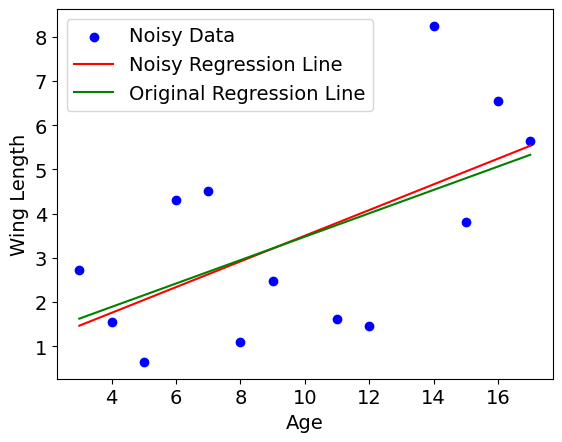

Pearson's Correlation Coefficient (r): 0.98


In [50]:
# 7: Add some noise to the data and see how the regression changes.

# Add some random noise to the wing length data
np.random.seed(23)  # Set a random seed for reproducibility
noise = np.random.normal(0, 2, len(wing_length))  # Add Gaussian noise with mean 0 and standard deviation 2
noisy_wing_length = wing_length + noise

# Create a scatter plot of the noisy data
plt.scatter(age, noisy_wing_length, label='Noisy Data', color='blue', marker='o')

# Fit a linear regression model to the noisy data
regressor = LinearRegression()
regressor.fit(age.reshape(-1, 1), noisy_wing_length)

# Plot the regression line for the noisy data
plt.plot(age, regressor.predict(age.reshape(-1, 1)), color='red', label='Noisy Regression Line')

# Fit a linear regression model to the original data (without noise)
regressor.fit(age.reshape(-1, 1), wing_length)

# Plot the original regression line (without noise) for comparison
plt.plot(age, regressor.predict(age.reshape(-1, 1)), color='green', label='Original Regression Line')

# Add labels and a legend
plt.xlabel('Age')
plt.ylabel('Wing Length')
plt.legend()

# Show the plot
plt.show()

correlation_coefficient_noise = np.corrcoef(age, noisy_wing_length)[0, 1]
print(f"Pearson's Correlation Coefficient (r): {correlation_coefficient:.2f}")


The Pearson's correlation coefficient remains the same, however after visual/qualitative inspection of the data, it does not fit as well to a linear model so this must be taken with a grain of salt.